In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [32]:
x=df.iloc[:,0:-1]

In [33]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [34]:
y=df.iloc[:,-1]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
x_train.shape

(614, 8)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc=StandardScaler()

In [40]:
x_train_scaled=sc.fit_transform(x_train)

In [41]:
x_test_scaled=sc.transform(x_test)

In [42]:
x_train_scaled

array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
         2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
        -0.61552223, -1.03594038]])

In [43]:
from sklearn.linear_model import SGDClassifier

In [44]:
sgd=SGDClassifier()

In [45]:
sgd.fit(x_train_scaled,y_train)

SGDClassifier()

In [46]:
y_pred= sgd.predict(x_test_scaled)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test,y_pred)

0.6688311688311688

In [50]:
from xgboost import XGBClassifier

In [51]:
xgb=XGBClassifier()

In [52]:
xgb.fit(x_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [54]:
y_pred=xgb.predict(x_test_scaled)

In [55]:
accuracy_score(y_test,y_pred)

0.6883116883116883

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr=LinearRegression()

In [58]:
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [59]:
y_pred=lr.predict(x_test_scaled)

In [60]:
from sklearn.metrics import r2_score

In [61]:
r2_score(y_test,y_pred)

0.2550028117674178

In [62]:
from sklearn.ensemble import RandomForestClassifier
list1=[]
for i in range(1,101):
    classifier= RandomForestClassifier(n_estimators= i, criterion="entropy")  
    classifier.fit(x_train_scaled, y_train) 
    y_pred=classifier.predict(x_test_scaled)
    list1.append(accuracy_score(y_test,y_pred))

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

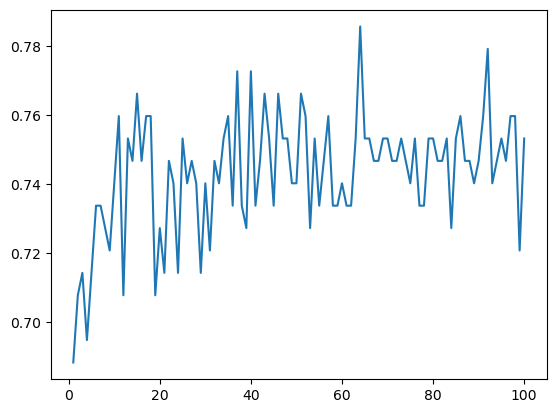

In [64]:
plt.plot(range(1,101),list1)

In [65]:
list2=[]
for i in range(58,70):
    classifier= RandomForestClassifier(n_estimators= i, criterion="entropy")  
    classifier.fit(x_train_scaled, y_train) 
    y_pred=classifier.predict(x_test_scaled)
    list2.append(accuracy_score(y_test,y_pred))

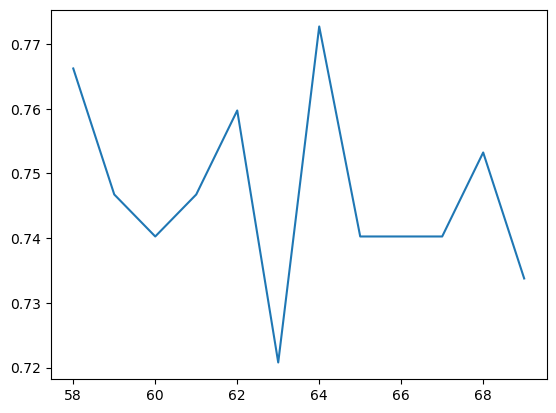

In [66]:
plt.plot(range(58,70),list2)

In [67]:
classifier= RandomForestClassifier(n_estimators= 64, criterion="entropy")  
classifier.fit(x_train_scaled, y_train) 
y_pred=classifier.predict(x_test_scaled)

In [68]:
accuracy_score(y_test,y_pred)

0.7662337662337663